In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np


db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Richa@1234",
                             database = "Ecommerce")

cur = db.cursor()


## 1. List all unique cities where customers are located.


In [9]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## 2. Count the number of orders placed in 2017.

In [25]:
query = """select count(order_id) from orders where order_purchase_timestamp = 2017"""

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are:", data[0][0]

('Total orders placed in 2017 are:', 45101)

## 3. Find the total sales per category.

In [47]:
query = """select upper(products.product_category), 
round(sum(payments.payment_value), 2)
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'Sales'])

df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


## 4. Calculate the percentage of orders that were paid in installments.

In [54]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/ count(*)*100
            from payments"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is:", data[0][0]

('the percentage of orders that were paid in installments is:',
 Decimal('99.9981'))

## 5. Count the number of customers from each state. 

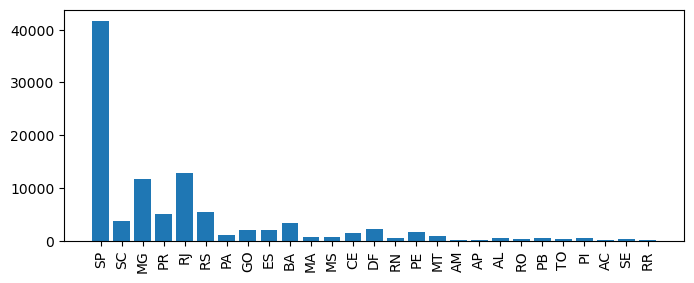

In [83]:
query = """ select distinct customer_state, count(customer_unique_id) from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State" , "Total_Customers"])

plt.figure(figsize = (8, 3))

plt.bar(df["State"], df["Total_Customers"])

plt.xticks(rotation = 90)

plt.show()

## 6. Calculate the number of orders per month in 2018.

,order_count,per_month
0,6292,July
1,6512,August
2,6728,February
3,6167,June
4,7211,March
5,7269,January
6,6873,May
7,6939,April
8,16,September
9,4,October


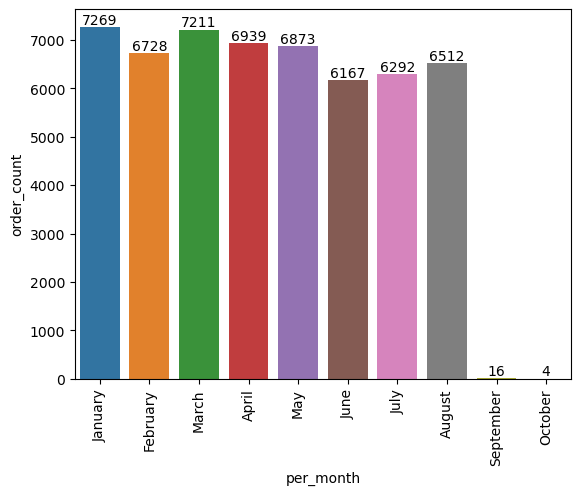

In [114]:
query = """ SELECT count(order_id), monthname(order_purchase_timestamp) as per_month
FROM orders
Where order_purchase_timestamp = 2018
GROUP BY 2 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["order_count", "per_month"])

o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

ax = sns.barplot(x = df["per_month"], y = df["order_count"], data = df, order = o)

plt.xticks(rotation = 90)

ax.bar_label(ax.containers[0])

df

## 7. Find the average number of products per order, grouped by customer city.

In [131]:
query = """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by 1, 2)

select customers.customer_city, round(avg(count_per_order.oc), 1) as avg_count
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by 1
order by 2 desc
limit 10
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Customer_city', 'Avg_orders'])

df


,Customer_city,Avg_orders
0,padre carvalho,7.0
1,celso ramos,6.5
2,candido godoi,6.0
3,datas,6.0
4,matias olimpio,5.0
5,picarra,4.0
6,teixeira soares,4.0
7,morro de sao paulo,4.0
8,cidelandia,4.0
9,curralinho,4.0


## 8. Calculate the percentage of total revenue contributed by each product category.

In [140]:
query = """select upper(products.product_category), 
round((sum(payments.payment_value)/ (select sum(payment_value) from payments))*100, 2)as percentage_revenue
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category
order by 2 desc
limit 15"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'percentage of total revenue'])

df

,Category,percentage of total revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


## 9. Identify the correlation between product price and the number of times a product has been purchased.

In [161]:
query = """ select products.product_category, count(order_items.product_id), round(avg(order_items.price), 2) 
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Product Category", "Order Count", "Product Price"])

arr1 = df["Order Count"]
arr2 = df["Product Price"]

np.corrcoef([arr1, arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

## 10.  Calculate the total revenue generated by each seller, and rank them by revenue.

,seller id,total revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12,3
3,46dc3b2cc0980fb8ec44634e21d2718e,148864.34,4
4,620c87c171fb2a6dd6e8bb4dec959fc6,145267.95,5
5,f8db351d8c4c4c22c6835c19a46f01b0,76665.19,6
6,1835b56ce799e6a4dc4eddc053f04066,75255.73,7
7,c3cfdc648177fdbbbb35635a37472c53,58623.68,8
8,7299e27ed73d2ad986de7f7c77d919fa,47194.54,9
9,c003204e1ab016dfa150abc119207b24,31661.51,10


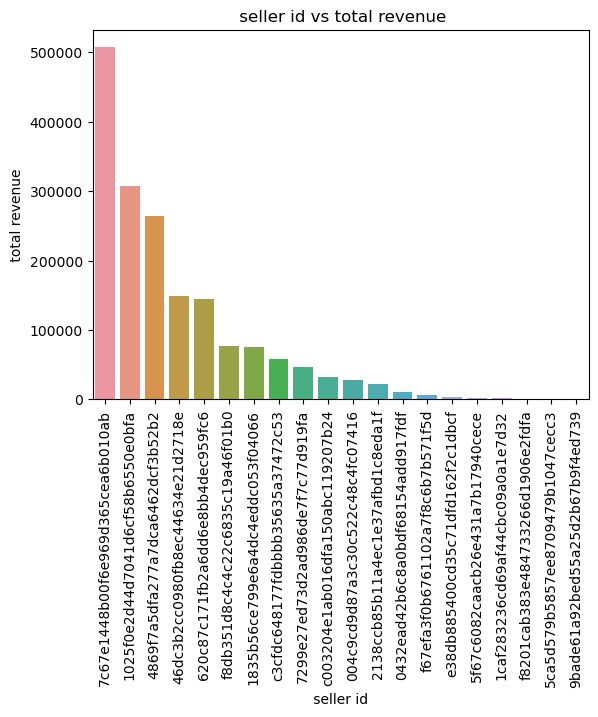

In [186]:
query = """ select *, dense_rank() over(order by revenue desc) as rn 
from
(select order_items.seller_id, round(sum(payment_value), 2) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id
limit 20) as a """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = [" seller id ", " total revenue ", " rank "])

sns.barplot(x = " seller id ", y = " total revenue ", data = df)

plt.xticks(rotation = 90)

plt.title(" seller id vs total revenue")

df

